In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Goal: For a Bernoulli-like statistic, find the value pairs, that suffice a threshold value (here: >= 0.5)

def estimator(x, y):
    """
    The estimator
    x, y: int, x <= y
    """
    return x/(x+y)

def uncertainty(x, y, s=1):
    """
    The error estimator (Gaussian error propagation)
    x, y: int, x <= y. The respective uncertainties are assumed to be Poisson distributed.
    s: int, approximate standard deviation, <= 3
    """
    return s*np.sqrt(((np.sqrt(x)/(x+y)) * (1 - x/(x+y)))**2 + (x * np.sqrt(y)/ (x+y)**2)**2)

In [92]:
x = np.arange(1, 100, 1)
y = np.arange(1, 100, 1)

x, y = np.meshgrid(x, y)

z = estimator(x, y)
dz = uncertainty(x, y, 1)

resid = z - dz
# mask the area, where this condition is fulfilled
resid[resid<0.5] = 0
resid[resid>=0.5] = 1

Text(0, 0.5, 'Y')

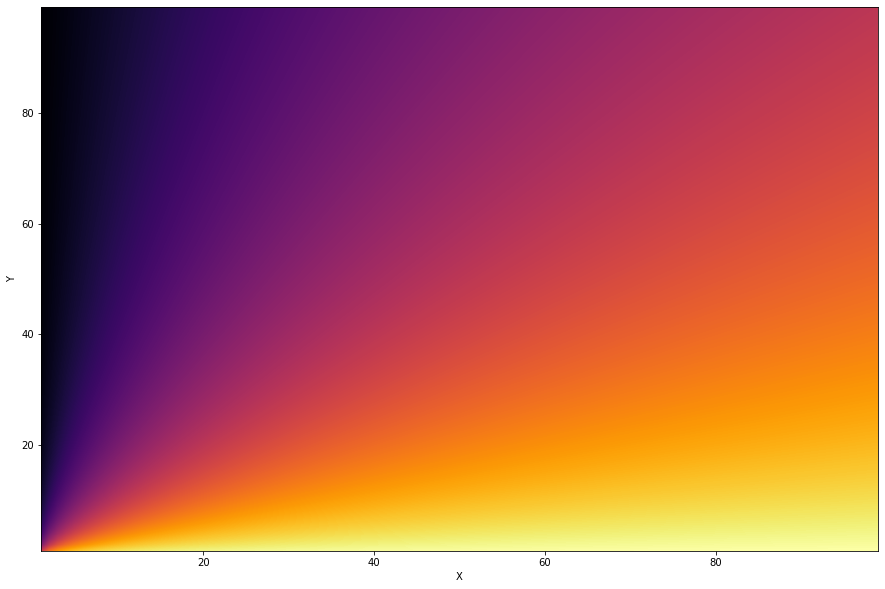

In [52]:
# values closer to unity are brighter

plt.figure(figsize=(15, 10))
plt.contourf(x, y, z, levels=1000, cmap='inferno')
plt.xlabel('X')
plt.ylabel('Y')

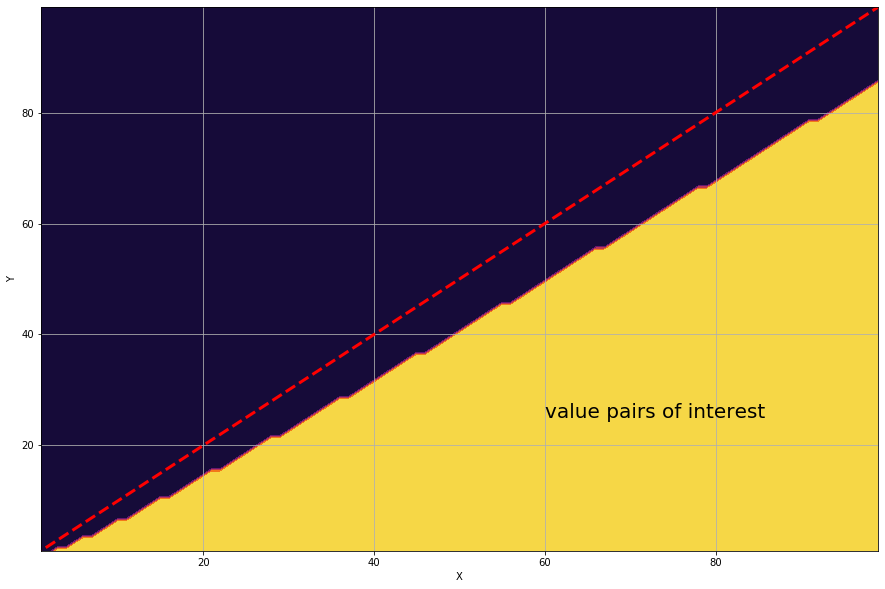

In [48]:
# Contourplot after subtracting the standard deviation
# Points-of-interest are colored yellow

plt.figure(figsize=(15, 10))
plt.axis([1, 99, 1, 99])
plt.contourf(x, y, resid, levels=5, cmap='inferno')
plt.plot([0, 100], [0, 100], 'r--', lw=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.text(x=60, y=25, s='value pairs of interest', size=20)
plt.grid()

[0, 10, 0, 10]

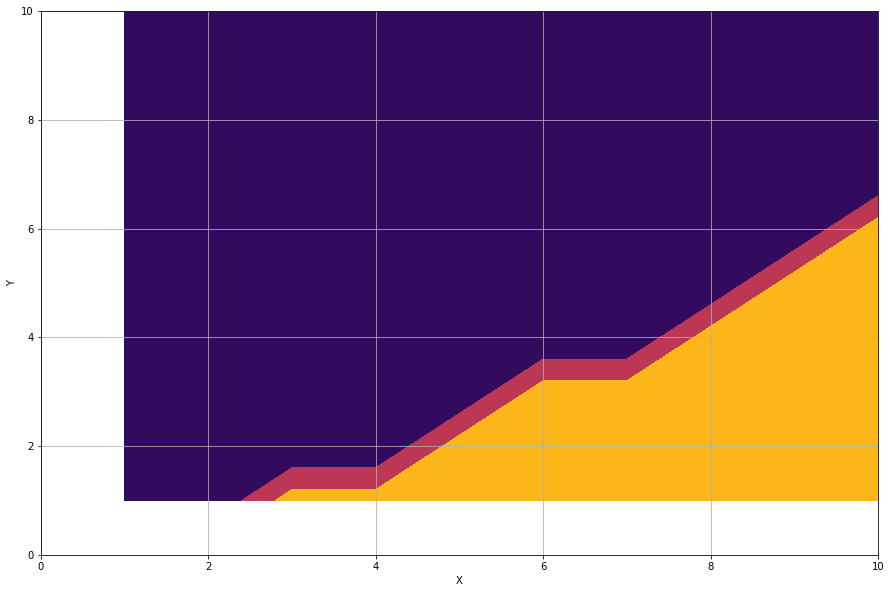

In [114]:
# Zoom-in of the previous plot

plt.figure(figsize=(15, 10))
plt.contourf(x, y, resid, levels=2, cmap='inferno')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.axis([0,10,0,10])

# Refresh: Bernoulli statistic

Text(0, 0.5, 'Probability')

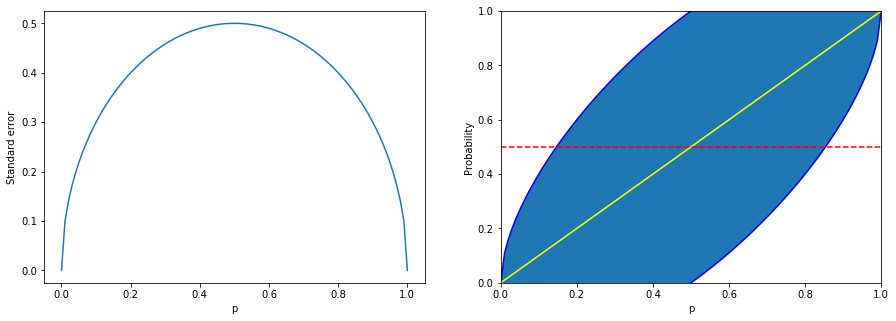

In [79]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
p = np.linspace(0, 1, 100)
dp = np.sqrt(p*(1-p))

plt.plot(p, dp)
plt.xlabel('p')
plt.ylabel('Standard error')


# How does the error ellipse look like?
plt.subplot(1,2,2)
plt.plot(p, p-dp, color='b')
plt.plot(p, p+dp, color='b')
plt.fill_between(p, p-dp, p+dp)
plt.plot(p, p, color='yellow')
plt.plot([0, 1], [0.5, 0.5], 'r--')
plt.axis([0, 1, 0, 1])
plt.xlabel('p')
plt.ylabel('Probability')

# Right plot: For each p, you would expect to observe on average the probability on the yellow line

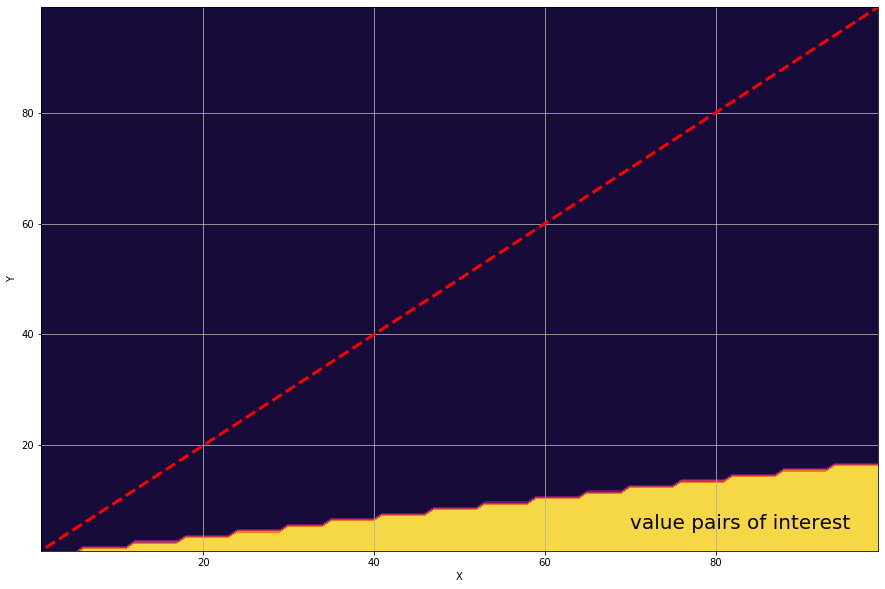

In [99]:
# Let us repeat the above exercise for the variance
# The tendency goes towards more extreme ratios

resid2 = z - np.sqrt(z*(1-z))
resid2[resid2<0.5] = 0
resid2[resid2>=0.5] = 1

plt.figure(figsize=(15, 10))
plt.axis([1, 99, 1, 99])
plt.contourf(x, y, resid2, levels=5, cmap='inferno')
plt.plot([0, 100], [0, 100], 'r--', lw=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.text(x=70, y=5, s='value pairs of interest', size=20)
plt.grid()

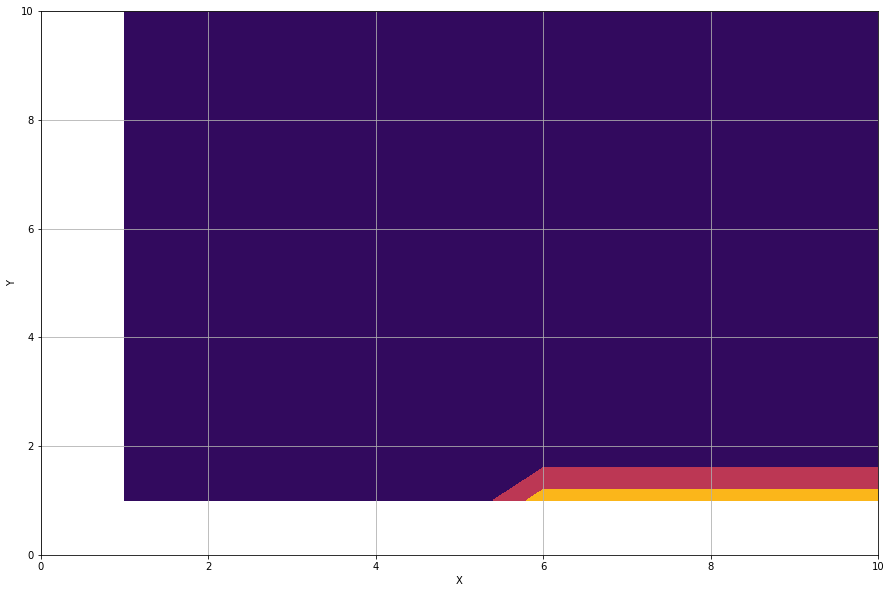

In [112]:
plt.figure(figsize=(15, 10))
plt.axis([0, 10, 0, 10])
plt.contourf(x, y, resid2, levels=2, cmap='inferno')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()